<a href="https://colab.research.google.com/github/khemsu/LangGraph_tut/blob/main/LangGraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install langgraph langsmith


In [ ]:
!pip install langchain langchain_groq langchain_community

In [ ]:
from google.colab import userdata
groq_api_key=userdata.get('Groq_api_key')
langsmith=userdata.get('langsmith_api_key')
print(langsmith)

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


In [ ]:
import os
os.environ["LANGCHAIN_API_KEY"]= langsmith
os.environ["LANGCHAIN_TRACING_V2"]= "true"
os.environ["LANGCHAIN_PROJECT"]= "CourseLanggraph"

In [ ]:
from langchain_groq import ChatGroq

In [ ]:
llm = ChatGroq(groq_api_key=groq_api_key,model_name="Gemma2-9b-It")#llm for chatbot using chatgroq
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7b0619303a50>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7b0619139a50>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [ ]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):
    # Messages have the type "list". The `add_messages` function
    # in the annotation defines how this state key should be updated
    # (in this case, it appends messages to the list, rather than overwriting them)
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

In [ ]:
graph_builder #graph is built at 0x7a518ab69610

## Creating chatbot


In [ ]:
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}


# The first argument is the unique node name
# The second argument is the function or object that will be called whenever
# the node is used.


defining node

In [ ]:
graph_builder.add_node("chatbot", chatbot)

Adding edges

In [ ]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
graph = graph_builder.compile()

Printing the flow of graph


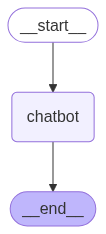

In [ ]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: hello
Assistant: Hello! 👋

How can I help you today? 😄

User: what is generative AI
Assistant: Generative AI is a type of artificial intelligence that focuses on creating new content, rather than simply analyzing existing data. 

Think of it like this:

* **Traditional AI:** Learns patterns and makes predictions based on given data (e.g., classifying images, recommending products).

* **Generative AI:** Learns the underlying structure of data and uses that knowledge to generate new, original content (e.g., writing text, composing music, creating images).

**How it works:**

Generative AI models are typically trained on massive datasets of text, code, images, audio, or other types of data. They learn the statistical relationships within this data, identifying patterns and structures. Then, they can use this learned knowledge to generate new content that adheres to those patterns.

**Examples of Generative AI:**

* **Text Generation:** ChatGPT, Bard, Jasper (writing stories, articl